In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from matplotlib.pyplot import cm
import pandas as pd

In [17]:
background="#203323"
line="#e0fce5"

def drawSequence(seq, background = "white", line = "black", save = None):
    color=iter(cm.rainbow(np.linspace(0,1,len(seq['x']))))
    background="#203323"
    line="#e0fce5"
    
    biggest_t = 0
    for arr in seq['time']:
        if arr[-1] > biggest_t:
            biggest_t = arr[-1]
    
    #6.8
    fig3 = plt.figure(constrained_layout=True, figsize=(21.8,10.6), facecolor=(background), edgecolor = (line))
    grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.2)
    
    
    ax1 = plt.subplot(grid[:, 0])
    ax1 = verticalPitch(ax1,"#203323", "#e0fce5")
    ax1.margins(0)

    ax2 = plt.subplot(grid[0, 1:])
    ax2 = getAxes(ax2)
    ax2.set_xlabel('Time',fontsize='large')
    ax2.set_ylabel('Y',fontsize='large')
    ax2.set_ylim(-3,103)

             
    ax3 = plt.subplot(grid[1, 1:])
    ax3 = getAxes(ax3)
    ax3.set_xlabel('Time',fontsize='large')
    ax3.set_ylabel('X', fontsize='large')
    ax3.set_ylim(-3,103)

    rat = biggest_t / 103
    wid = biggest_t / 20
    
    for i in range(0,len(seq['x'])):
        c=next(color)
        x = seq['x'].iloc[i]
        y = seq['y'].iloc[i]
        time = seq['time'].iloc[i]
        
        #for horizontal plot
        hseq_x = [i * 1.04 for i in x]
        hseq_y = [i * 0.68 for i in y]
        
        #Coordinates converted for vertical graph
        vseq_x = [68 - i for i in hseq_y]
        vseq_y = hseq_x
        ax1.arrow(vseq_x[-2], vseq_y[-2],vseq_x[-1] - vseq_x[-2], vseq_y[-1] - vseq_y[-2],
                  color= c, head_width=1.8, head_length=1.8, linewidth = 0)

        plt.sca(ax1)
        plt.plot(vseq_x, vseq_y, linestyle = (0, (5, 1)), color = c, zorder = 100) 
        
        plt.sca(ax2)

        plt.plot(time, x, color = c, linestyle = (0, (5, 1)))
        plt.xlim(xmin=0)
        
        plt.sca(ax3)

        plt.plot(time, y, color = c, linestyle = (0, (5, 1)))
        plt.xlim(xmin=0)
        
    if save is not None: 
        plt.savefig(save, facecolor = background)

In [18]:
def verticalPitch(ax, background = "white", line = "black"):
    
    #fig,ax = plt.subplots(figsize=(6.8,10.4))
    ax.axis('off') # this hides the x and y ticks
    
    # side and goal lines #
    lx1 = [0,0,68,68,0]
    ly1 = [0,104,104,0,0]
    
    plt.plot(lx1,ly1,color=line,lw=3.5,zorder=5)
    
    lx2 = [13.84,13.84,54.16,54.16] 
    ly2 = [104,87.5,87.5,104]
    plt.plot(lx2,ly2,color=line,lw=1.5,zorder=5)
 
    lx3 = [13.84,13.84,54.16,54.16] 
    ly3 = [0,16.5,16.5,0]
    plt.plot(lx3,ly3,color=line,lw=1.5,zorder=5)
        #goals#
    lx4 = [30.34,30.34,37.66,37.66]
    ly4 = [104,104.2,104.2,104]
    plt.plot(lx4,ly4,color=line,lw=1.5,zorder=5)
    
    lx5 = [30.34,30.34,37.66,37.66]
    ly5 = [0,-0.2,-0.2,0]
    plt.plot(lx5,ly5,color=line,lw=1.5,zorder=5)
        
    #6 yard boxes#
    lx6 = [24.84,24.84,43.16,43.16]
    ly6 = [104,99.5,99.5,104]
    plt.plot(lx6,ly6,color=line,zorder=5,lw=1.5)
    
    lx7 = [24.84,24.84,43.16,43.16]
    ly7 = [0,4.5,4.5,0]
    plt.plot(lx7,ly7,color=line,zorder=5,lw=1.5)
    
    #Halfway line, penalty spots, and kickoff spot
    vcx5 = [0,68] 
    vcy5 = [52,52]
    plt.plot(vcx5,vcy5,color=line,zorder=5,lw=1.5)
    
    
    plt.scatter(34,93,color=line,zorder=5)
    plt.scatter(34,11,color=line,zorder=5)
    plt.scatter(34,52,color=line,zorder=5)    
    
    circle1 = plt.Circle((34,93.5), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
    circle2 = plt.Circle((34,10.5), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
    circle3 = plt.Circle((34, 52), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=2,alpha=1)
    
    ## Rectangles in boxes
    rec1 = plt.Rectangle((20,87.5), 30,16,ls='-',color=background, zorder=1,alpha=1,lw=1.5)
    rec2 = plt.Rectangle((20, 0), 30,16.5,ls='-',color=background, zorder=1,alpha=1,lw=1.5)
     
    ## Pitch rectangle
    rec3 = plt.Rectangle((-1,-1), 70,106,lw=1.5,color=background,zorder=1,alpha=1)
     
    ax.add_artist(rec3)
    ax.add_artist(circle1)
    ax.add_artist(circle2)
    ax.add_artist(rec1)
    ax.add_artist(rec2)
    ax.add_artist(circle3)
    
    return ax


In [19]:
def getAxes(axes):
    
    axes.patch.set_facecolor(background)
    axes.spines['bottom'].set_color(line)
    axes.spines['top'].set_color(background) 
    axes.spines['right'].set_color(background)
    axes.spines['left'].set_color(line)
    axes.yaxis.label.set_color(line)
    axes.xaxis.label.set_color(line)
    axes.set_xticklabels([])
    axes.set_yticklabels([])
    axes.spines['bottom'].set_linewidth(1.5)
    axes.spines['left'].set_linewidth(1.5)

    return axes

In [ ]:
path = '/DATA/PATH'
sequences = pd.read_csv(path)

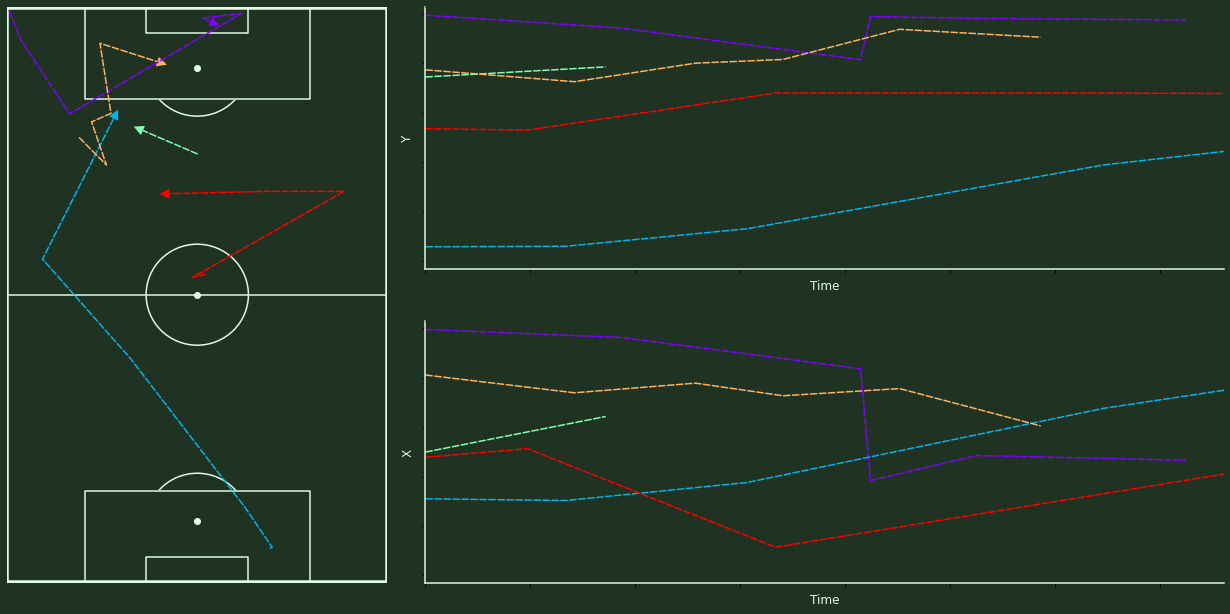

In [21]:
#drawSequence(sequences.head(5))